In [1]:
# Comparisons, masks and Boolean Logic

In [2]:
### Example: Counting Rainy Days

In [4]:
!head -4 ../Class-Lecture/Seattle2014.csv

STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140101,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140102,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140103,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999


In [15]:
import numpy as np
import pandas as pd

# using pandas to extract rainfall inches in a NumPy array
rainfall = pd.read_csv('../Class-Lecture/Seattle2014.csv')['PRCP'].values #.values is used to convert the col to a numpy array
inches = rainfall / 254.0 #1/10mm inches
inches.shape


(365,)

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot styles

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <BarContainer object of 40 artists>)

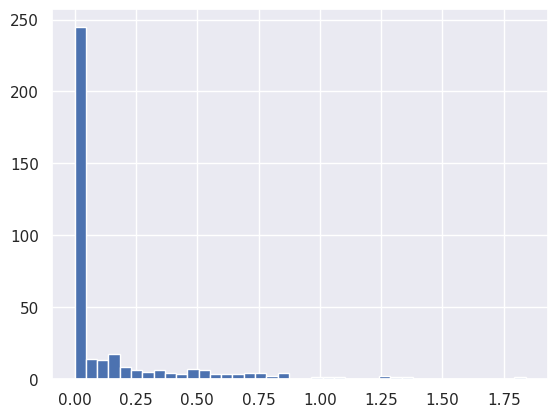

In [13]:
plt.hist(inches,40)

In [27]:
x = np.array([1,2,3,4,5])

In [28]:
x < 3

array([ True,  True, False, False, False])

In [29]:
x > 3

array([False, False, False,  True,  True])

In [30]:
x <=3

array([ True,  True,  True, False, False])

In [31]:
x == 3

array([False, False,  True, False, False])

In [32]:
x >=3

array([False, False,  True,  True,  True])

In [33]:
x!= 3

array([ True,  True, False,  True,  True])

In [34]:
2 * x == (x ** 2)

array([False,  True, False, False, False])

In [35]:
np.less(x,3)

array([ True,  True, False, False, False])

In [36]:
np.greater(x,3)

array([False, False, False,  True,  True])

In [37]:
rng = np.random.RandomState(0)

In [38]:
x = rng.randint(10, size=(3,4))

In [40]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

Working with booleans

In [41]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


Counting Entries

In [42]:
np.count_nonzero(x<6)

8

In [43]:
np.sum(x < 6)

8

In [44]:
np.sum(x<6, axis=1)

array([4, 2, 2])

In [45]:
np.any(x>8)

True

In [46]:
np.all(x<10)

True

In [47]:
np.all(x<8, axis=1)

array([ True, False,  True])

### Boolean operators

In [49]:
np.sum((inches > 0.5) & (inches < 1) )

29

In [50]:
np.sum(~((inches <=0.5) | (inches >= 1)))

29

In [51]:
np.sum(inches == 0)

215

In [52]:
np.sum(inches !=0)

150

In [53]:
np.sum(inches > 0.5)

37

In [54]:
np.sum((inches > 0) & (inches < 0.2))

75

Boolean Arrays as Masks

In [55]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [56]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [57]:
x[x<5]

array([0, 3, 3, 3, 2, 4])

In [59]:
#construct a mask of all rainy days
rainy = (inches > 0)

#construct a mask of all summer days (jun 21 is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("median precip on rainy days in 2014 (inches): ", np.median(inches[rainy]))
print("median precip on summer days in 2014 (inches): ", np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ", np.max(inches[summer]))
print("median precip on non-summer days in 2014 (inches): ", np.median(inches[rainy & ~summer]))


median precip on rainy days in 2014 (inches):  0.19488188976377951
median precip on summer days in 2014 (inches):  0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
median precip on non-summer days in 2014 (inches):  0.20078740157480315


### Aside: using the keywords and/or versus the Operators &/|

In [60]:
bool(41), bool(0)

(True, False)

In [61]:
bool(42 and 0)

False

In [62]:
bool(42 or 0)

True

In [63]:
bin(42)

'0b101010'

In [64]:
bin(59)

'0b111011'

In [65]:
bin(0)

'0b0'

In [66]:
bin(42 & 59)

'0b101010'

In [67]:
bin(42 | 59)

'0b111011'

In [68]:
A = np.array([1,0,1,0,1,0], dtype=bool)
B = np.array([1,1,1,0,1,1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

In [69]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [70]:
A & B

array([ True, False,  True, False,  True, False])

In [71]:
A and B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [72]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [73]:
(x > 4 ) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()